In [ ]:
# Doc2Vec Using gensim

# Step 1 : Prepare the document such away of Tagged Document
# ex: TaggedDocument(words=['godlessness', 'many', 'door', 'school', 'ritalin', 'guess', 'whats', 'list'], tags='POLITICS')

# Step2 : Train and build the model Doc2Vec using gensim
# model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
# model_dbow.build_vocab([x for x in tqdm(tagged_doc_label)])

# Step3 : use infer_vector() to generate a vector given a document which is in trained data and 
#   unzip the data and seperate vector data and target labels

# Step4 : Use Logistic Regression to train the model

In [329]:
import pandas as pd


df = pd.read_json("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\data_news.json")

df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


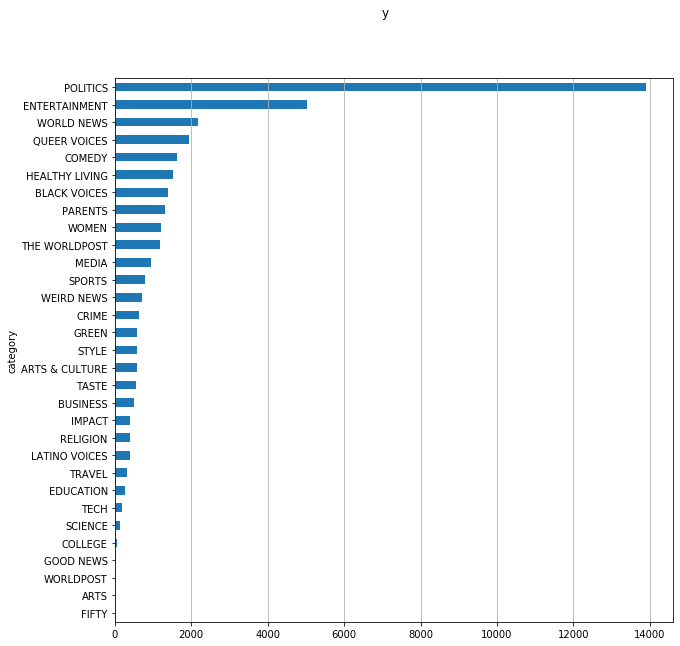

In [139]:
import matplotlib.pyplot as plt

fig, ax = plt. subplots(figsize=(10,10))
fig.suptitle("y", fontsize=12)

df["category"].reset_index().groupby("category").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')

plt.show()

In [140]:
# consider only the ''ENTERTAINMENT','POLITICS','TECH'' category

df = df[df['category'].isin(['ENTERTAINMENT','POLITICS','TECH'])][['category','short_description']]

In [141]:
df.head(3)

,category,short_description
1,ENTERTAINMENT,Of course it has a song.
2,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...


In [142]:
df.category.unique()

array(['ENTERTAINMENT', 'POLITICS', 'TECH'], dtype=object)

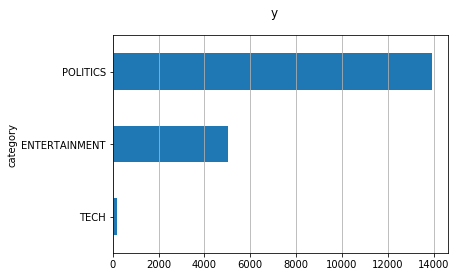

In [143]:
import matplotlib.pyplot as plt

fig, ax = plt. subplots()
fig.suptitle("y", fontsize=12)

df["category"].reset_index().groupby("category").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')

plt.show()

In [144]:
import nltk
import re

from nltk.corpus import stopwords

'''Pre process Text.
    : stop word removal
    : tokenize
    : Lemmatization
    '''
def preprocessText(text):
    
    # convert lower and remove punctuaions and strip
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    
    # tokenize the senetnce
    lst_text = text.split()
    
    # remove Stopwords
    lst_text = [word for word in lst_text if word not in stopwords.words("english")]
    
    # Lemmatisation (convert the word into root word)
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]
        
    # join the tokens
    text = ' '.join(lst_text)
    
    return text

In [145]:
df['text_clean'] = df['short_description'].apply(preprocessText)

In [146]:
df.head()

,category,short_description,text_clean
1,ENTERTAINMENT,Of course it has a song.,course song
2,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...,actor longtime girlfriend anna eberstein tied ...
3,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...,actor give dems asskicking fighting hard enoug...
4,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ...",dietland actress said using bag really cathart...
5,ENTERTAINMENT,"""It is not right to equate horrific incidents ...",right equate horrific incident sexual assault ...


In [166]:
df.shape

(19129, 3)

In [209]:
# Create Tagged Document
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec


In [168]:
category = 'ENTERTAINMENT'


df[df['category'] == category]

,category,short_description,text_clean
1,ENTERTAINMENT,Of course it has a song.,course song
2,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...,actor longtime girlfriend anna eberstein tied ...
3,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...,actor give dems asskicking fighting hard enoug...
4,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ...",dietland actress said using bag really cathart...
5,ENTERTAINMENT,"""It is not right to equate horrific incidents ...",right equate horrific incident sexual assault ...
...,...,...,...
39322,ENTERTAINMENT,YES!,yes
39362,ENTERTAINMENT,Our hearts are sufficiently warmed.,heart sufficiently warmed
39364,ENTERTAINMENT,These two 😍,two
39365,ENTERTAINMENT,The actor died last week after suffering a hea...,actor died last week suffering heart attack


In [201]:
df['text_clean_asda'] = df['text_clean'].str.split()

,category,short_description,text_clean,text_clean_asda
1,ENTERTAINMENT,Of course it has a song.,course song,"[course, song]"
2,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...,actor longtime girlfriend anna eberstein tied ...,"[actor, longtime, girlfriend, anna, eberstein,..."
3,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...,actor give dems asskicking fighting hard enoug...,"[actor, give, dems, asskicking, fighting, hard..."
4,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ...",dietland actress said using bag really cathart...,"[dietland, actress, said, using, bag, really, ..."
5,ENTERTAINMENT,"""It is not right to equate horrific incidents ...",right equate horrific incident sexual assault ...,"[right, equate, horrific, incident, sexual, as..."
...,...,...,...,...
39322,ENTERTAINMENT,YES!,yes,[yes]
39362,ENTERTAINMENT,Our hearts are sufficiently warmed.,heart sufficiently warmed,"[heart, sufficiently, warmed]"
39364,ENTERTAINMENT,These two 😍,two,[two]
39365,ENTERTAINMENT,The actor died last week after suffering a hea...,actor died last week suffering heart attack,"[actor, died, last, week, suffering, heart, at..."


In [281]:
# Generate tagged Documents

tagged_doc_label = []

tagged_doc_label.clear()

for doc in df.values:
    label = doc[0]
    doc_tokens = doc[3]
    tagged_doc_label.append(TaggedDocument(doc_tokens,label))

len(tagged_doc_label)

19129

In [283]:
tagged_doc_label[40]

TaggedDocument(words=['godlessness', 'many', 'door', 'school', 'ritalin', 'guess', 'whats', 'list'], tags='POLITICS')

In [287]:
# Set-up Doc2Vec Training
from tqdm import tqdm
import multiprocessing
cores = multiprocessing.cpu_count()

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)

model_dbow.build_vocab([x for x in tqdm(tagged_doc_label)])


100%|███████████████████████████████████████████████████████████████████████| 19129/19129 [00:00<00:00, 1301741.56it/s]


In [289]:
from sklearn import utils


for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(tagged_doc_label)]), total_examples=len(tagged_doc_label), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|████████████████████████████████████████████████████████████████████████| 19129/19129 [00:00<00:00, 927504.41it/s]


In [305]:
sents = tagged_doc_label
targets, regressors = zip(*[(doc.tags, model_dbow.infer_vector(doc.words, steps=20)) for doc in sents])

In [313]:
sents[0]

TaggedDocument(words=['course', 'song'], tags='ENTERTAINMENT')

In [314]:
regressors[0]

# below is the embedding for  the words=['course', 'song']

# its 300 length array  we can use Logistic Regression for trainig Algorithm


array([-0.26230726, -0.27870345,  0.16489877,  0.22187087,  0.16509062,
       -0.21233135,  0.4943022 ,  0.05017448,  0.13216747, -0.93856543,
        0.09673601,  0.03677853, -0.19135912, -0.48932272, -0.17296317,
        0.3113948 ,  0.4358622 ,  0.00169334,  0.02245156,  0.14078929,
        0.0762305 ,  0.48287103,  0.28597635, -0.05815482, -0.4917301 ,
        0.15422353,  0.34009266,  0.32063368, -0.07076068,  0.28220493,
       -0.39563823, -0.3108152 , -0.10417586, -0.09840092,  0.22619209,
        0.29471588, -0.52797264,  0.47311276, -0.27278194,  0.62693626,
       -0.12246664, -0.02855081,  0.1111244 ,  0.34020478,  0.6000667 ,
       -0.20550258,  0.18573853,  0.7680983 ,  0.39841497, -0.2310721 ,
       -0.38865942,  0.07603721,  0.12050067,  0.00500514, -0.22949424,
       -0.3068516 ,  0.14530148,  0.17742787,  0.18645169, -0.817249  ,
        0.01857433, -0.6762794 ,  0.31995264, -0.41648677, -0.0600251 ,
        0.46551308,  0.0100096 , -0.09801411, -0.04434578,  0.04

In [317]:
from sklearn.linear_model import LogisticRegression

X_train = regressors[:100]
y_train = targets[:100]

X_test = regressors[101:200]

logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

c:\users\insakum46\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\insakum46\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [318]:
y_pred

array(['ENTERTAINMENT', 'POLITICS', 'ENTERTAINMENT', 'ENTERTAINMENT',
       'POLITICS', 'ENTERTAINMENT', 'POLITICS', 'POLITICS',
       'ENTERTAINMENT', 'ENTERTAINMENT', 'POLITICS', 'POLITICS',
       'POLITICS', 'ENTERTAINMENT', 'POLITICS', 'POLITICS', 'POLITICS',
       'POLITICS', 'POLITICS', 'ENTERTAINMENT', 'POLITICS',
       'ENTERTAINMENT', 'ENTERTAINMENT', 'ENTERTAINMENT', 'ENTERTAINMENT',
       'POLITICS', 'ENTERTAINMENT', 'ENTERTAINMENT', 'POLITICS',
       'ENTERTAINMENT', 'POLITICS', 'POLITICS', 'POLITICS',
       'ENTERTAINMENT', 'ENTERTAINMENT', 'POLITICS', 'ENTERTAINMENT',
       'ENTERTAINMENT', 'POLITICS', 'ENTERTAINMENT', 'ENTERTAINMENT',
       'ENTERTAINMENT', 'POLITICS', 'ENTERTAINMENT', 'POLITICS',
       'POLITICS', 'POLITICS', 'POLITICS', 'ENTERTAINMENT', 'POLITICS',
       'POLITICS', 'POLITICS', 'POLITICS', 'POLITICS', 'ENTERTAINMENT',
       'ENTERTAINMENT', 'POLITICS', 'ENTERTAINMENT', 'POLITICS',
       'ENTERTAINMENT', 'ENTERTAINMENT', 'POLITICS', 'POLIT

In [328]:
pd.DataFrame({"Predicted ":list(y_pred),"Y_test ": y_test})

,Predicted,Y_test
0,ENTERTAINMENT,ENTERTAINMENT
1,POLITICS,ENTERTAINMENT
2,ENTERTAINMENT,POLITICS
3,ENTERTAINMENT,POLITICS
4,POLITICS,POLITICS
...,...,...
94,ENTERTAINMENT,POLITICS
95,ENTERTAINMENT,POLITICS
96,POLITICS,ENTERTAINMENT
97,POLITICS,POLITICS
